In [1]:
import hydra
from hydra.core.global_hydra import GlobalHydra

GlobalHydra.instance().clear()
hydra.initialize(version_base=None, config_path="../conf")
cfg = hydra.compose(config_name="config")

%load_ext autoreload
%autoreload 2

In [2]:
# Load configuration
tickers = cfg.market.tickers
interval = cfg.market.interval

fee_rate = cfg.market.fee_rate
initial_cash = cfg.market.initial_cash
risk_free_rate = cfg.market.risk_free_rate_annual

position_size = cfg.strategy.pos_size
beta_hedge = cfg.strategy.beta_hedge
is_spread = cfg.strategy.is_spread

In [3]:
pair_selection_start = cfg.pair_selection.start
pair_selection_end = cfg.pair_selection.end

In [4]:
# Load data
from modules.data_services.data_loaders import load_data

df = load_data(
    tickers=tickers,
    start=pair_selection_start,
    end=pair_selection_end,
    interval=interval
)

In [5]:
# Pair Selection (select a TOP5 pairs)
from modules.data_services.statistical_tests import engle_granger_cointegration

eg_df = engle_granger_cointegration(df)
tickers = eg_df.iloc[0:5, 0].tolist()
eg_df.head(5)

,pair,eg_p_value,adf_stat
0,ETHUSDT-BCHUSDT,0.002988,-4.256718
1,BTCUSDT-BCHUSDT,0.004171,-4.161398
2,BNBUSDT-UNIUSDT,0.007593,-3.982967
3,BTCUSDT-ADAUSDT,0.013955,-3.790522
4,BTCUSDT-SOLUSDT,0.015325,-3.759751


In [6]:
pre_training_start = cfg.training.pre_start
training_start = cfg.training.start
training_end = cfg.training.end

pre_test_start = cfg.strategy.pre_start
test_start = cfg.strategy.start
test_end = cfg.strategy.end

Pair: ETHUSDT/BCHUSDT
{'rolling_window': 16, 'entry_threshold': 2.0213416311668393, 'exit_threshold': 0.6828547884480868, 'stop_loss': 2.2794823975229868}
3.9544
                     ETHUSDT  BCHUSDT  z_score    beta  entry_thr  exit_thr  \
open_time                                                                     
2024-03-01 00:00:00  3378.73    304.2  -0.6965  0.5883     2.0213    0.6829   
2024-03-01 01:00:00  3375.20    306.1  -0.6870  0.5782     2.0213    0.6829   
2024-03-01 02:00:00  3366.73    313.5  -0.7839  0.4374     2.0213    0.6829   
2024-03-01 03:00:00  3367.79    317.5  -0.7214  0.4662     2.0213    0.6829   
2024-03-01 04:00:00  3376.87    315.1  -0.4102  0.4104     2.0213    0.6829   
...                      ...      ...      ...     ...        ...       ...   
2024-03-31 20:00:00  3633.25    680.5   1.2961  0.0086     2.0213    0.6829   
2024-03-31 21:00:00  3625.32    678.8   0.3747  0.0192     2.0213    0.6829   
2024-03-31 22:00:00  3629.80    680.8   0.7202  

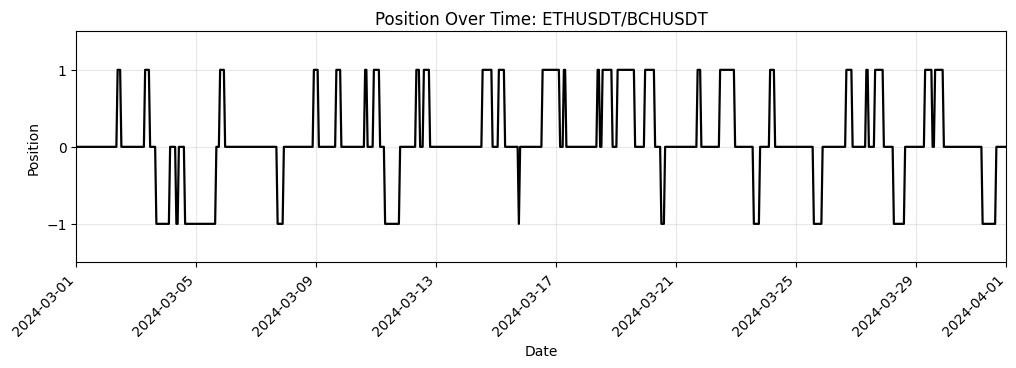

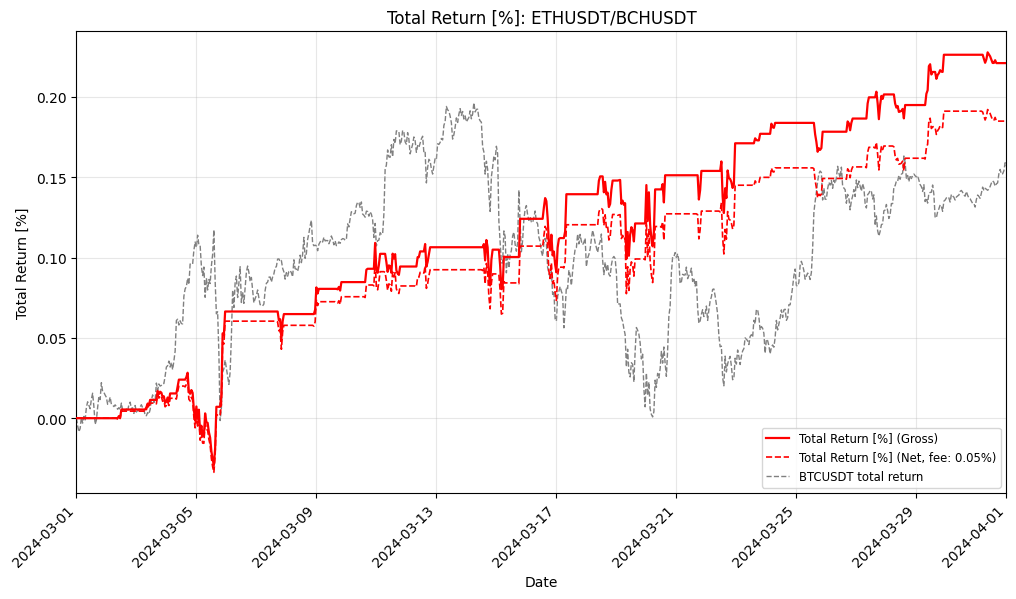

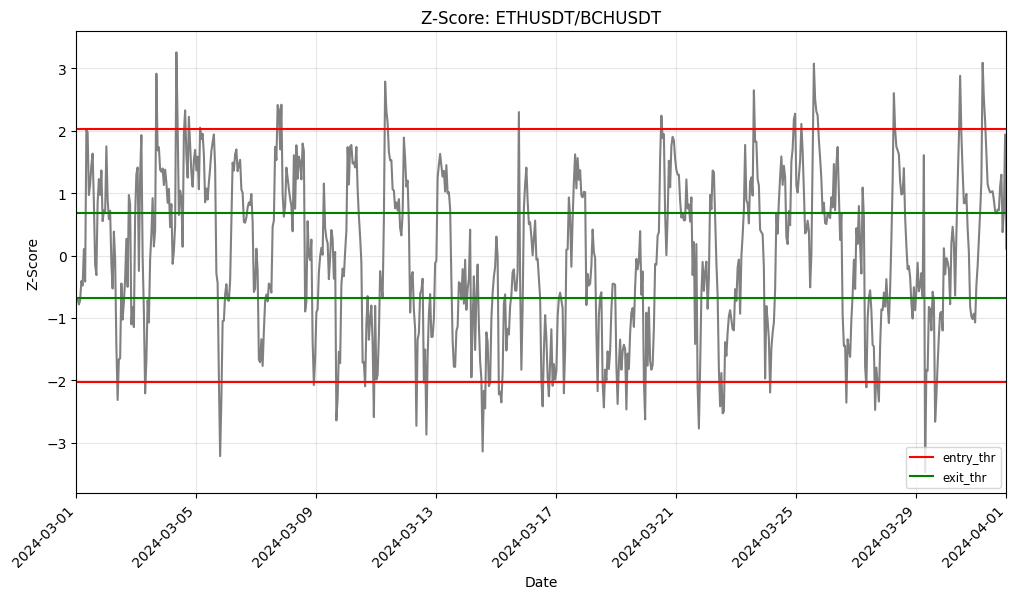

Pair: BTCUSDT/BCHUSDT
{'rolling_window': 14, 'entry_threshold': 2.0453293502997303, 'exit_threshold': 0.9483639468528199, 'stop_loss': 2.93845954514096}
-0.7669
                      BTCUSDT  BCHUSDT  z_score    beta  entry_thr  exit_thr  \
open_time                                                                      
2024-03-01 00:00:00  61501.11    304.2  -0.5318  0.4235     2.0453    0.9484   
2024-03-01 01:00:00  61214.35    306.1  -0.7759  0.4126     2.0453    0.9484   
2024-03-01 02:00:00  60980.00    313.5  -0.9469  0.3038     2.0453    0.9484   
2024-03-01 03:00:00  61105.91    317.5  -0.6759  0.2932     2.0453    0.9484   
2024-03-01 04:00:00  61524.09    315.1   0.1332  0.2576     2.0453    0.9484   
...                       ...      ...      ...     ...        ...       ...   
2024-03-31 20:00:00  70840.00    680.5   1.3482  0.0084     2.0453    0.9484   
2024-03-31 21:00:00  70856.00    678.8   1.2101  0.0099     2.0453    0.9484   
2024-03-31 22:00:00  70970.00    680.8 

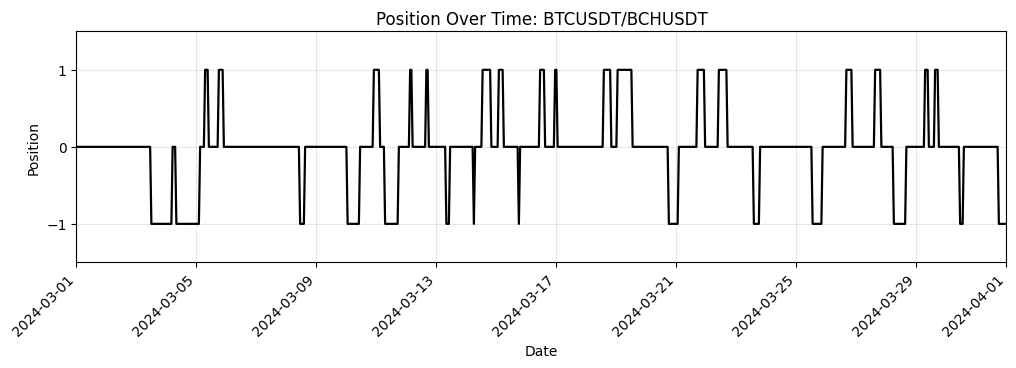

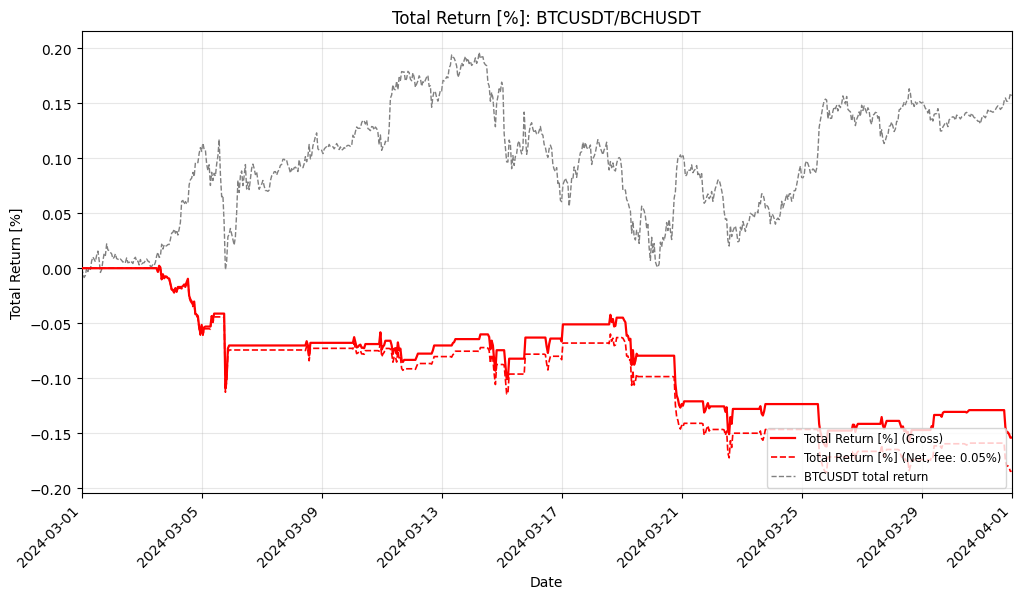

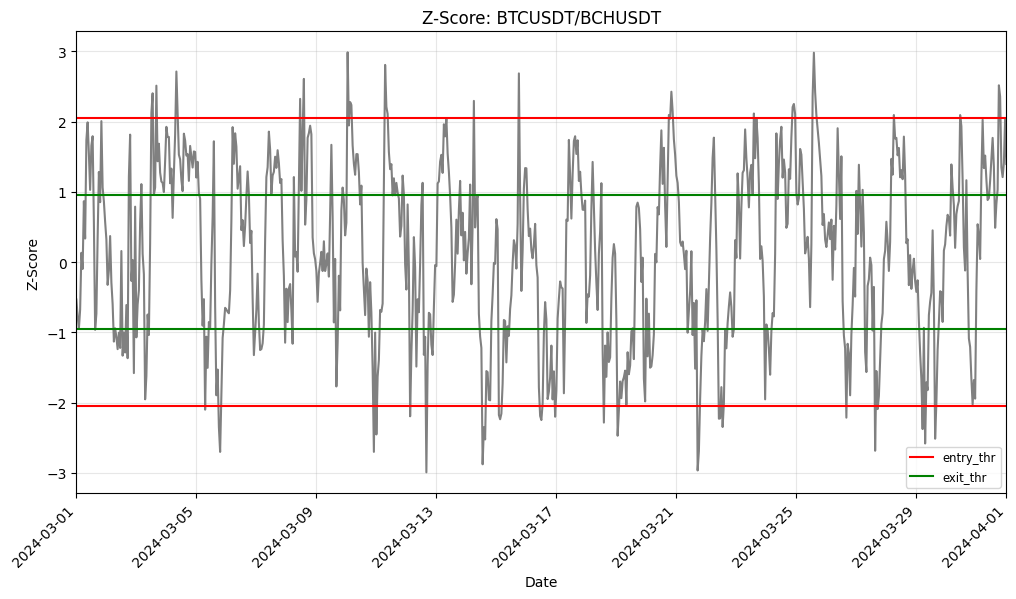

Pair: BNBUSDT/UNIUSDT
{'rolling_window': 14, 'entry_threshold': 2.1328411425241542, 'exit_threshold': 0.8771428458525559, 'stop_loss': 2.5344101957867466}
10.489
                     BNBUSDT  UNIUSDT  z_score    beta  entry_thr  exit_thr  \
open_time                                                                     
2024-03-01 00:00:00    404.3   11.212  -0.2521  0.2044     2.1328    0.8771   
2024-03-01 01:00:00    405.3   11.221   0.1045  0.2004     2.1328    0.8771   
2024-03-01 02:00:00    405.4   11.060   0.1704  0.1774     2.1328    0.8771   
2024-03-01 03:00:00    405.6   11.051   0.3149  0.1930     2.1328    0.8771   
2024-03-01 04:00:00    406.9   11.015   0.7721  0.1888     2.1328    0.8771   
...                      ...      ...      ...     ...        ...       ...   
2024-03-31 20:00:00    606.9   13.022   1.4391  0.2624     2.1328    0.8771   
2024-03-31 21:00:00    606.1   12.945   1.0025  0.1969     2.1328    0.8771   
2024-03-31 22:00:00    605.8   12.906   0.7044  

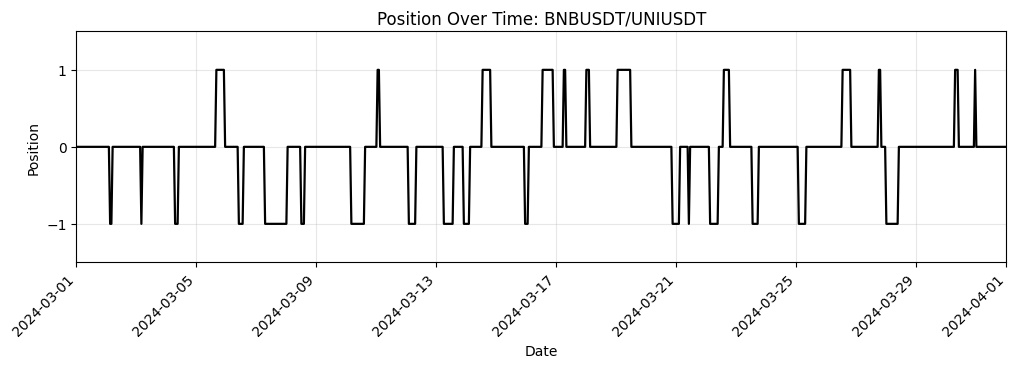

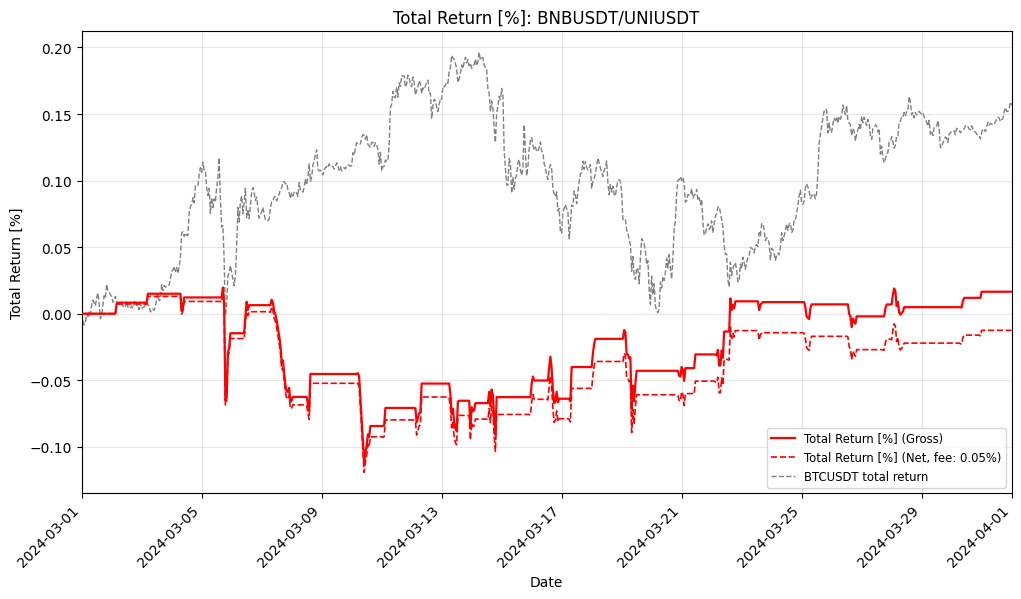

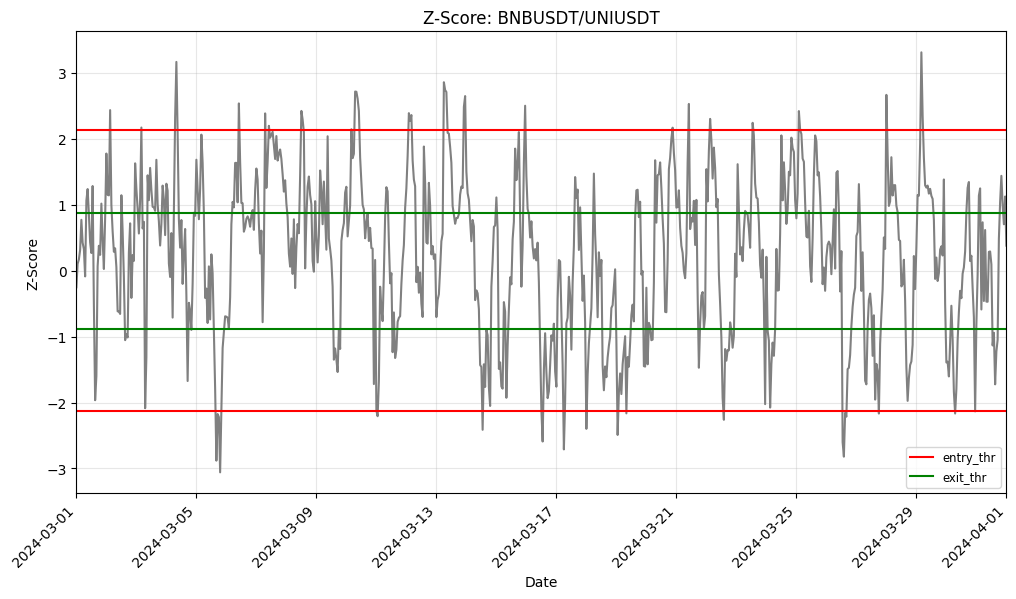

Pair: BTCUSDT/ADAUSDT
{'rolling_window': 14, 'entry_threshold': 2.0727056616810535, 'exit_threshold': 0.9877120985310862, 'stop_loss': 2.2920937071610683}
-1.1594
                      BTCUSDT  ADAUSDT  z_score    beta  entry_thr  exit_thr  \
open_time                                                                      
2024-03-01 00:00:00  61501.11   0.6718  -0.5320  0.3732     2.0727    0.9877   
2024-03-01 01:00:00  61214.35   0.6727  -0.7743  0.4218     2.0727    0.9877   
2024-03-01 02:00:00  60980.00   0.6763  -0.9428  0.4093     2.0727    0.9877   
2024-03-01 03:00:00  61105.91   0.6727  -0.6706  0.3962     2.0727    0.9877   
2024-03-01 04:00:00  61524.09   0.6743   0.1369  0.4100     2.0727    0.9877   
...                       ...      ...      ...     ...        ...       ...   
2024-03-31 20:00:00  70840.00   0.6490   1.3497  0.0193     2.0727    0.9877   
2024-03-31 21:00:00  70856.00   0.6461   1.2114  0.0630     2.0727    0.9877   
2024-03-31 22:00:00  70970.00   0.648

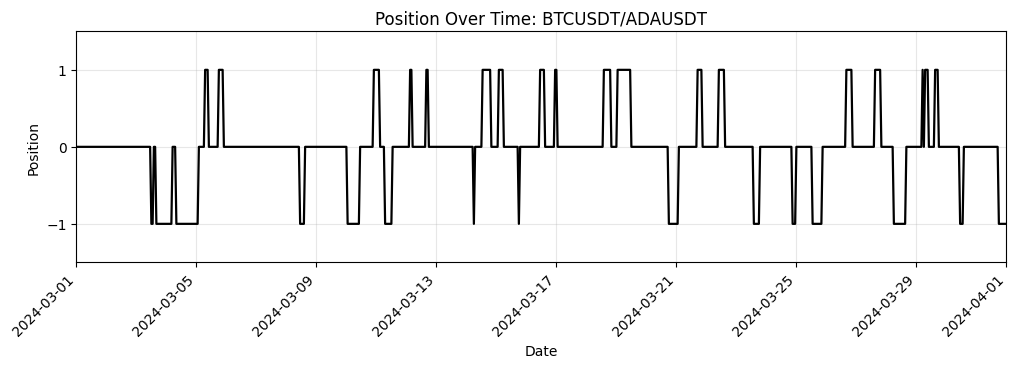

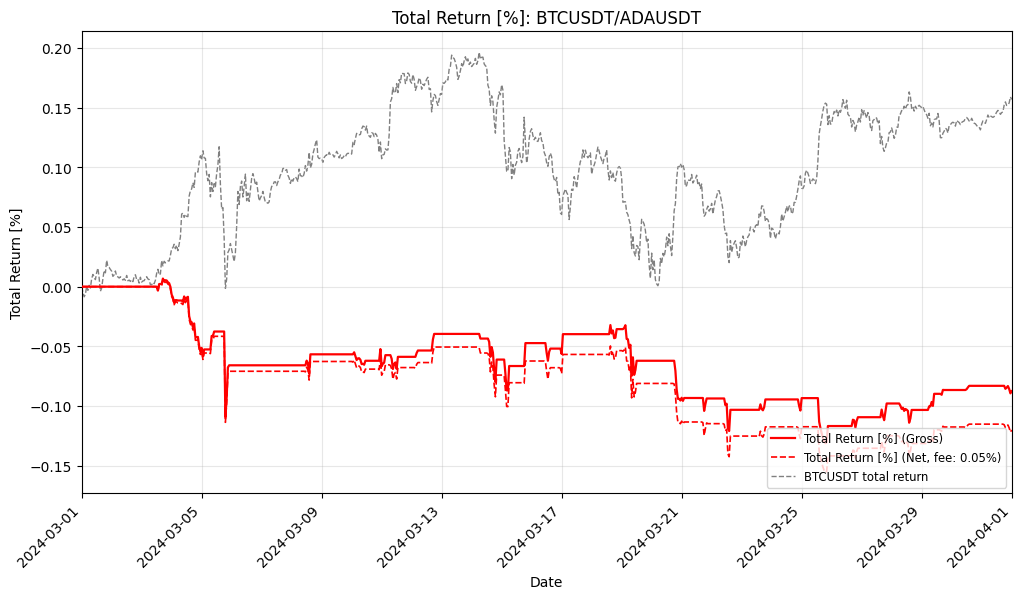

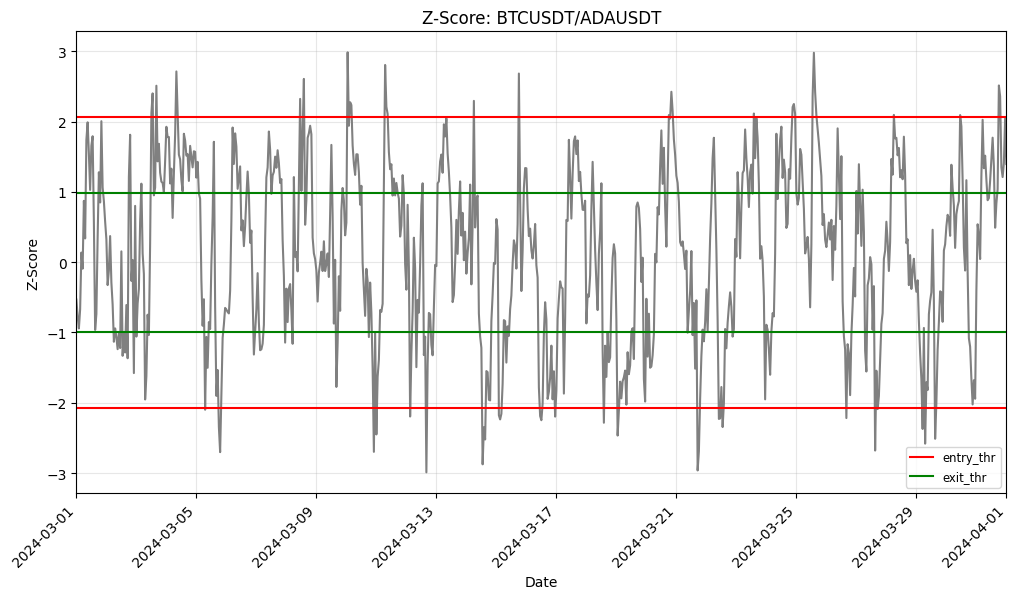

Pair: BTCUSDT/SOLUSDT
{'rolling_window': 11, 'entry_threshold': 2.3695834860627927, 'exit_threshold': 0.9800411291579484, 'stop_loss': 2.280119207053074}
-0.9263
                      BTCUSDT  SOLUSDT  z_score    beta  entry_thr  exit_thr  \
open_time                                                                      
2024-03-01 00:00:00  61501.11   132.93  -0.2456  0.2162     2.3696      0.98   
2024-03-01 01:00:00  61214.35   135.71  -0.5299  0.2035     2.3696      0.98   
2024-03-01 02:00:00  60980.00   133.85  -0.8982  0.1990     2.3696      0.98   
2024-03-01 03:00:00  61105.91   133.94  -0.4739  0.1879     2.3696      0.98   
2024-03-01 04:00:00  61524.09   137.49   0.6730  0.1518     2.3696      0.98   
...                       ...      ...      ...     ...        ...       ...   
2024-03-31 20:00:00  70840.00   199.43   1.1259  0.3813     2.3696      0.98   
2024-03-31 21:00:00  70856.00   199.70   1.0116  0.4223     2.3696      0.98   
2024-03-31 22:00:00  70970.00   200.62

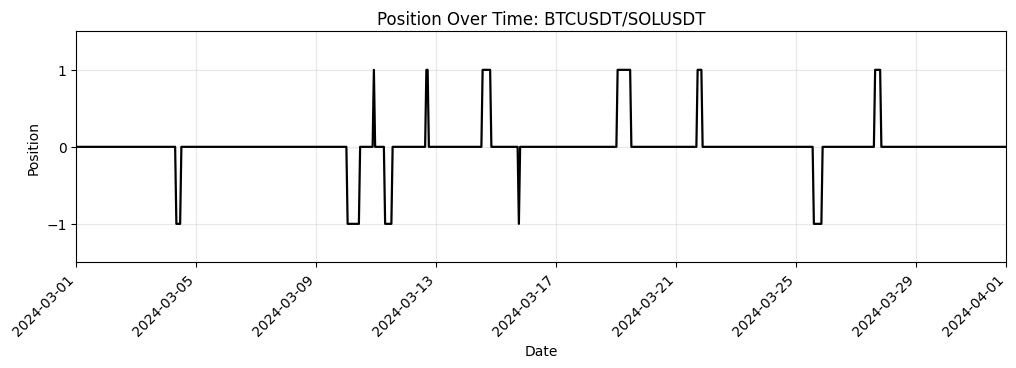

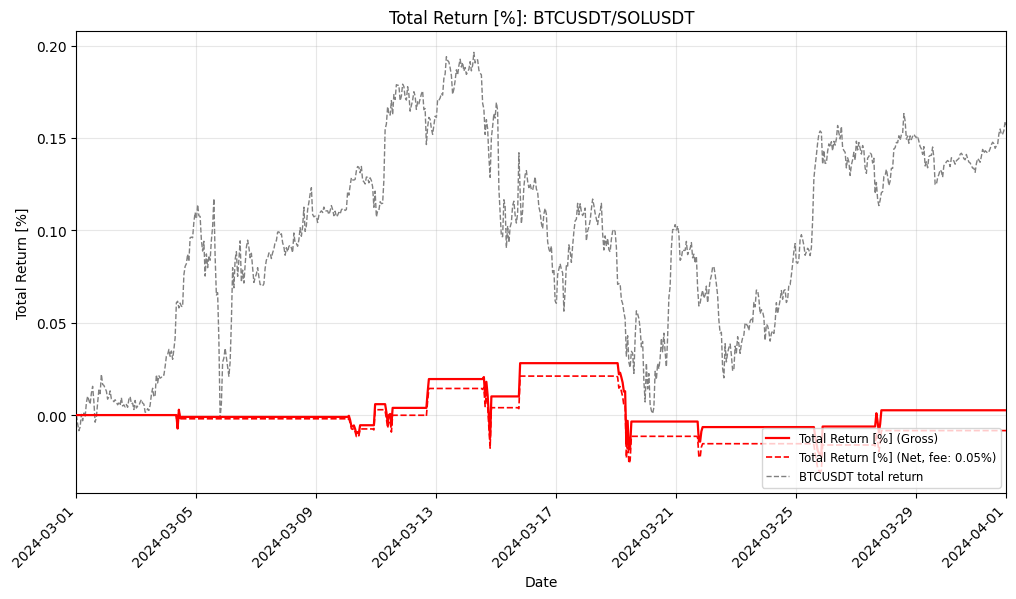

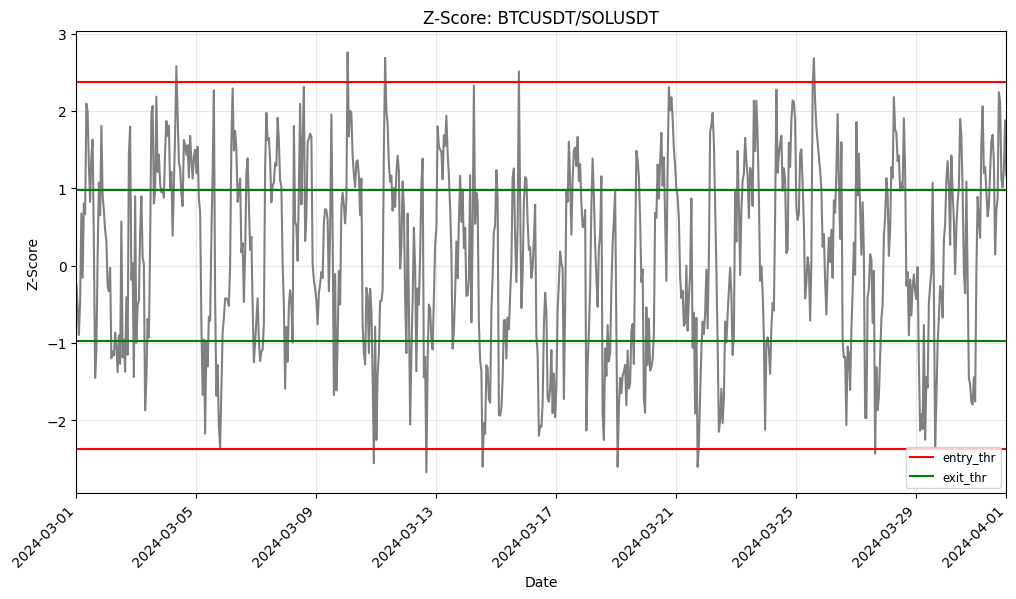

In [7]:
from modules.data_services.data_utils import add_returns
from modules.data_services.data_loaders import load_pair
from skopt.space import Integer, Real
from modules.core.models import Pair
from modules.performance.strategy import (
    calculate_stats,
    optimize_params,
    single_pair_strategy
)
from modules.visualization.plots import plot_positions, plot_zscore, plot_pnl

# Perform Bayesian Optimization
param_space = [
    Integer(10, 30, name="rolling_window"),
    Real(2.0, 2.5, name="entry_threshold"),
    Real(0.5, 1.0, name="exit_threshold"),
    Real(2.0, 3.0, name="stop_loss"),
]
metric = ("sortino_ratio_annual", "0.05% fee")

pairs = []
for ticker in tickers:
    ticker_x = ticker.split('-')[0]
    ticker_y = ticker.split('-')[1]
    print(f"Pair: {ticker_x}/{ticker_y}")

    best_params, best_score = optimize_params(ticker_x, ticker_y, fee_rate, initial_cash, position_size,
                                              pre_training_start, training_start, training_end, interval,
                                              beta_hedge, is_spread, risk_free_rate, param_space, metric)
    print(best_params)
    print(best_score)

    # === 2. Test ===

    # Load pair and calculate returns
    pair = load_pair(x=ticker_x, y=ticker_y, start=pre_test_start, end=test_end, interval=interval)
    add_returns(pair)

    entry_threshold = best_params["entry_threshold"]
    exit_threshold = best_params["exit_threshold"]
    stop_loss = best_params["stop_loss"]
    rolling_window = best_params["rolling_window"]

    # Run strategy
    pair.test_start = test_start
    pair.fee_rate = fee_rate
    pair.initial_cash = initial_cash

    single_pair_strategy(pair, rolling_window, entry_threshold, exit_threshold, stop_loss, position_size,
                         beta_hedge, is_spread)
    print(pair.data.drop(columns=['total_return', 'total_fees', 'net_return']))

    # Calculate statistics
    pair.stats = calculate_stats(pair, risk_free_rate)
    print(pair.stats)

    pairs.append(pair)

    # Visualization
    plot_positions(pair, show=True, save=False)

    btc_data = load_data(
        tickers=['BTCUSDT'],
        start=test_start,
        end=test_end,
        interval=interval,
    )
    btc_data['BTC_return'] = btc_data['BTCUSDT'].pct_change()
    btc_data.loc[btc_data.index[0], 'BTC_return'] = 0.0
    btc_data['BTC_cum_return'] = (1 + btc_data['BTC_return']).cumprod() - 1

    plot_pnl(pair, btc_data, show=True, save=False)
    plot_zscore(pair, show=True, save=False)

In [9]:
cols_to_sum = ['position', 'total_return', 'total_fees', 'net_return']
summary_data = pairs[0].data[cols_to_sum].copy()
for p in pairs[1:]:
    summary_data += p.data[cols_to_sum]
summary = Pair(data=summary_data, start=pre_test_start, test_start=test_start, end=test_end,
               interval=interval, fee_rate=fee_rate, initial_cash=initial_cash * 5)
summary.data['total_return_pct'] = summary.data['total_return'] / (initial_cash * 5)
summary.data['net_return_pct'] = summary.data['net_return'] / (initial_cash * 5)
summary.data['position'] = summary.data['position'] / 5
summary.stats = calculate_stats(summary, risk_free_rate)

In [10]:
# Show statistics
summary.stats

,0% fee,0.05% fee
metric,,
total_return,-0.0003,-0.0282
cagr,-0.0036,-0.2852
volatility,0.0035,0.0035
volatility_annual,0.3270,0.3290
max_drawdown,-0.0617,-0.0641
win_count,40.0000,39.0000
lose_count,20.0000,21.0000
win_rate,0.6667,0.6500
max_win,0.0161,0.0157


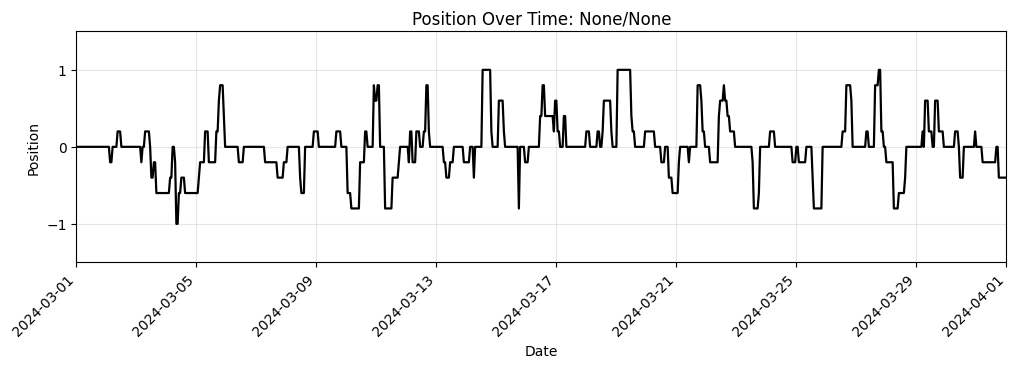

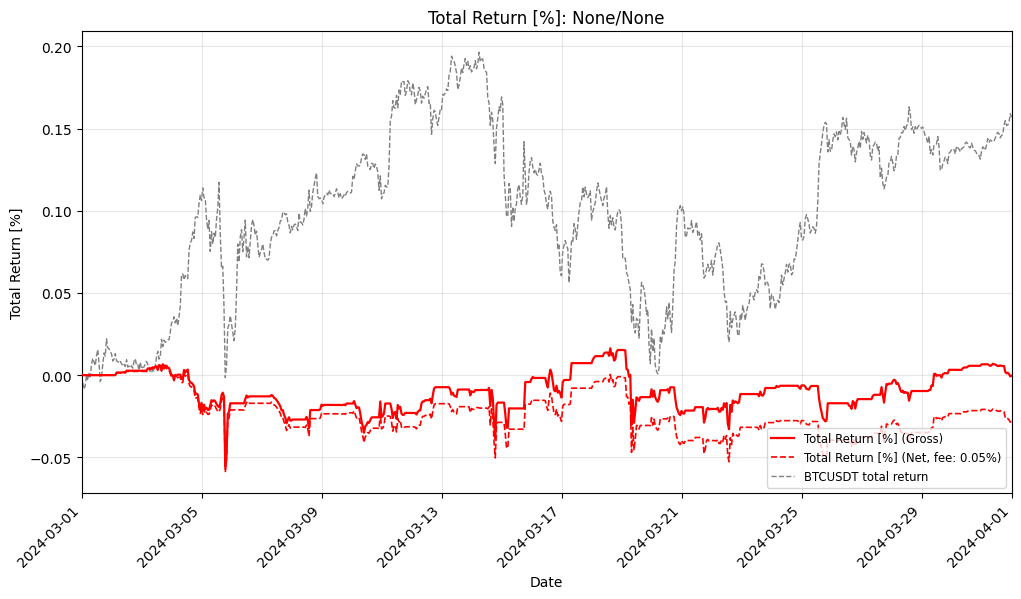

In [11]:
# Visualization
from modules.visualization.plots import plot_pnl

plot_positions(summary, show=True, save=False)

btc_data = load_data(
    tickers=['BTCUSDT'],
    start=test_start,
    end=test_end,
    interval=interval,
)
btc_data['BTC_return'] = btc_data['BTCUSDT'].pct_change()
btc_data.loc[btc_data.index[0], 'BTC_return'] = 0.0
btc_data['BTC_cum_return'] = (1 + btc_data['BTC_return']).cumprod() - 1

plot_pnl(summary, btc_data, show=True, save=False)

- druga para w większości benchmarków na okresie treningowym ma ujemne sortino ratio (źle dobrana, problem w selekcji par a nie parametrach)
- maksymalizowanie sortino ratio nie jest najefektywniejsze - wielokrotnie parametry o mniejszym sortino w okresie treningowym dawały regularny i wyższy pod względem total return wynik w okresie testowym